In [125]:
#librariries to import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [126]:
#read the data
data=pd.read_csv("train.csv")

In [127]:
#first 10 data
data.head(10)

,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,...,Lost_Tags,T_Number,CCL_cm,CCW_cm,Weight_Kg,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease
0,2000_RE_0060,2000-12-22,Researcher_25,CaptureSite_0,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,...,NaN,NaN,64.70,62.60,NaN,Unknown,algae at rear of shell,Released,ReleaseSite_50,22/12/00
1,2001_RE_0187,2001-10-28,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,...,NaN,NaN,35.85,31.35,NaN,Unknown,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,28/10/01
2,2001_RE_0197,2001-11-01,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,...,NaN,NaN,51.80,49.20,NaN,Unknown,clean,Released,ReleaseSite_50,01/11/01
3,2002_RE_0031,2002-03-11,Researcher_32,CaptureSite_0,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,...,NaN,NaN,60.50,59.00,NaN,Unknown,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,11/03/02
4,2002_RE_0118,2002-08-08,Researcher_25,CaptureSite_0,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,...,NaN,NaN,34.70,33.00,NaN,Unknown,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,08/08/02
5,2002_RE_0119,2002-08-10,Researcher_25,CaptureSite_0,Ocean,Not_Recorded,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0114,...,NaN,NaN,33.20,30.70,NaN,Unknown,large chip 6 LM,Released,ReleaseSite_8,10/08/02
6,2002_RE_0214,2002-10-21,Researcher_25,CaptureSite_0,Ocean,Net,Fisher_2013,LandingSite_CaptureSiteCategory_2,Species_6,KA460,...,NaN,NaN,37.40,33.50,NaN,Unknown,green and whitish-pink calcerous algae growth ...,Released,ReleaseSite_62,21/10/02
7,2002_RE_0215,2002-10-21,Researcher_25,CaptureSite_0,Ocean,Net,Fisher_1815,LandingSite_CaptureSiteCategory_2,Species_6,KA442,...,NaN,NaN,40.30,37.20,NaN,Unknown,calcerous algae growth-especially rear end and...,Released,ReleaseSite_50,21/10/02
8,2002_RE_0218,2002-10-22,Researcher_30,CaptureSite_0,Ocean,Net,Fisher_1815,LandingSite_CaptureSiteCategory_2,Species_5,KA466,...,NaN,NaN,44.00,43.20,NaN,Unknown,clean shell,Released,ReleaseSite_50,22/10/02
9,2003_RE_0187,2003-06-09,Researcher_32,CaptureSite_0,Ocean,Net,Fisher_1066,LandingSite_CaptureSiteCategory_2,Species_5,KE1184,...,NaN,NaN,48.30,43.30,NaN,Unknown,10 LMS has a small chip& right rear flipper is...,Released,ReleaseSite_62,NaN


In [128]:
#info on the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18062 entries, 0 to 18061
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rescue_ID              18062 non-null  object 
 1   Date_TimeCaught        18062 non-null  object 
 2   Researcher             18062 non-null  object 
 3   CaptureSite            18062 non-null  object 
 4   ForagingGround         18062 non-null  object 
 5   CaptureMethod          18062 non-null  object 
 6   Fisher                 18062 non-null  object 
 7   LandingSite            18062 non-null  object 
 8   Species                18062 non-null  object 
 9   Tag_1                  17937 non-null  object 
 10  Tag_2                  4911 non-null   object 
 11  Lost_Tags              925 non-null    object 
 12  T_Number               38 non-null     object 
 13  CCL_cm                 18038 non-null  float64
 14  CCW_cm                 18035 non-null  float64
 15  We

In [129]:
#Understand the data
data.columns

Index(['Rescue_ID', 'Date_TimeCaught', 'Researcher', 'CaptureSite',
       'ForagingGround', 'CaptureMethod', 'Fisher', 'LandingSite', 'Species',
       'Tag_1', 'Tag_2', 'Lost_Tags', 'T_Number', 'CCL_cm', 'CCW_cm',
       'Weight_Kg', 'Sex', 'TurtleCharacteristics', 'Status', 'ReleaseSite',
       'Date_TimeRelease'],
      dtype='object')

In [130]:
#Column Rescue_ID : It�s an individual bycatch incidence identity number. The numbers are consecutive, for each year 
                    # e.g. �2018_RE_0732 means rescue number 732 in year 2018"
data['Rescue_ID'].head(10)


0    2000_RE_0060
1    2001_RE_0187
2    2001_RE_0197
3    2002_RE_0031
4    2002_RE_0118
5    2002_RE_0119
6    2002_RE_0214
7    2002_RE_0215
8    2002_RE_0218
9    2003_RE_0187
Name: Rescue_ID, dtype: object

In [131]:
#Split the data based on rescue number and year 
data[['Year','RE','Rescue_number']]=data['Rescue_ID'].str.split('_', expand=True)

In [132]:
del data['RE']

In [133]:
#Rescue_number per year
rescue_number_per_year=data.groupby('Year')['Rescue_number'].count().to_dict()


In [134]:
rescue_number_per_year

{'1998': 16,
 '1999': 40,
 '2000': 62,
 '2001': 270,
 '2002': 291,
 '2003': 544,
 '2004': 456,
 '2005': 445,
 '2006': 404,
 '2007': 617,
 '2008': 853,
 '2009': 819,
 '2010': 1134,
 '2011': 1398,
 '2012': 1651,
 '2013': 1331,
 '2014': 1627,
 '2015': 1590,
 '2016': 1395,
 '2017': 1555,
 '2018': 1564}

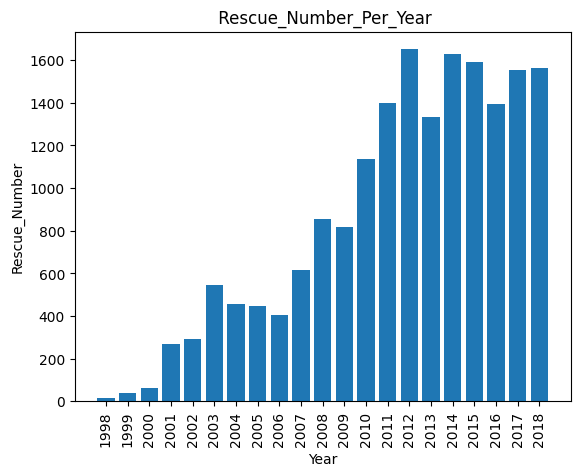

In [135]:
#plotting the number of rescue per year
plt.bar(rescue_number_per_year.keys(), rescue_number_per_year.values())
plt.xlabel('Year')
plt.ylabel('Rescue_Number')
plt.title(' Rescue_Number_Per_Year')
plt.xticks(rotation='vertical')
plt.show()

In [136]:
#Column Date_TimeCaught
data['Date_TimeCaught']

0        2000-12-22
1        2001-10-28
2        2001-11-01
3        2002-03-11
4        2002-08-08
            ...    
18057    2018-12-18
18058    2018-12-18
18059    2018-12-24
18060    2018-12-24
18061    2018-12-28
Name: Date_TimeCaught, Length: 18062, dtype: object

In [137]:
data['Date_TimeCaught']=pd.to_datetime(data['Date_TimeCaught'])

In [138]:
 #Splitting into separate columns for month and day
data['Month'] = data['Date_TimeCaught'].dt.month
data['Day'] =data['Date_TimeCaught'].dt.day
data['Year(1)']=data['Date_TimeCaught'].dt.year

In [139]:
#Convert 'Year' column to int
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')

In [140]:
data['Identical']=data['Year'] == data['Year(1)']

In [141]:
data['Identical'].value_counts()

Identical
True     18057
False        5
Name: count, dtype: int64

In [142]:
# Grouping by 'Month' and 'Year', and counting the number of records
records_per_month_year = data.groupby(['Month', 'Year']).size().reset_index(name='NumRescue')

In [143]:
# Finding the month and year with the most records
max_rescues = records_per_month_year.loc[records_per_month_year['NumRescue'].idxmax()]


In [144]:
max_rescues

Month          11
Year         2014
NumRescue     240
Name: 218, dtype: int64

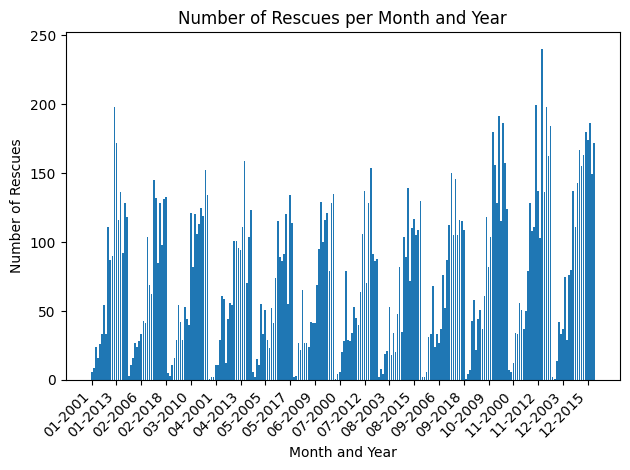

In [145]:
# Plotting the bar chart
plt.bar(records_per_month_year.index, records_per_month_year['NumRescue'])
plt.xlabel('Month and Year')
plt.ylabel('Number of Rescues')
plt.title('Number of Rescues per Month and Year')
# Display every label
plt.xticks(records_per_month_year.index[::12], [f"{month:02d}-{year}" for month, year in zip(records_per_month_year['Month'][::12], records_per_month_year['Year'][::12])], rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [146]:
#Column 3 : Researcher
data['Researcher']

0        Researcher_25
1         Researcher_6
2         Researcher_6
3        Researcher_32
4        Researcher_25
             ...      
18057    Researcher_30
18058    Researcher_30
18059    Researcher_30
18060    Researcher_30
18061    Researcher_30
Name: Researcher, Length: 18062, dtype: object

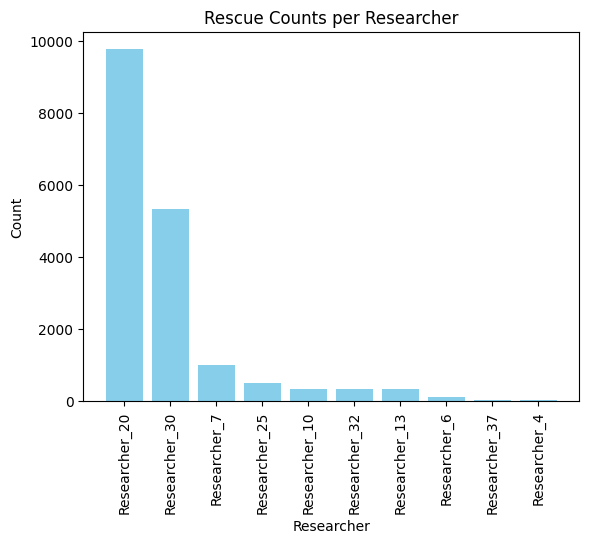

In [147]:
rescue_counts_researcher=data['Researcher'].value_counts()
#plotting bar chart
plt.bar(rescue_counts_researcher.head(10).index,rescue_counts_researcher.head(10).values,color='skyblue')
plt.xlabel('Researcher')
plt.ylabel('Count')
plt.title('Rescue Counts per Researcher')
plt.xticks(rotation='vertical')
plt.show()

In [148]:
#Column 4 CaptureSite
data['CaptureSite']

0        CaptureSite_0
1        CaptureSite_0
2        CaptureSite_0
3        CaptureSite_0
4        CaptureSite_0
             ...      
18057    CaptureSite_9
18058    CaptureSite_9
18059    CaptureSite_9
18060    CaptureSite_9
18061    CaptureSite_9
Name: CaptureSite, Length: 18062, dtype: object

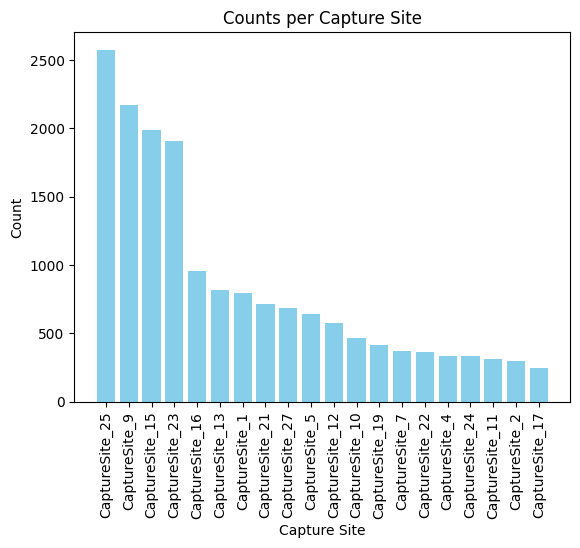

In [149]:
capture_site_counts=data['CaptureSite'].value_counts()
#plotting bar chart
plt.bar(capture_site_counts.head(20).index,capture_site_counts.head(20).values,color='skyblue')
plt.xlabel('Capture Site')
plt.ylabel('Count')
plt.title('Counts per Capture Site')
plt.xticks(rotation='vertical')
plt.show()

In [150]:
#Column 4 ForagingGround
#eneral area of ocean area where turtle was captured. The assumption is that the turtle was foraging where it was captured. 
# The foraging area is broadly classified either as the open ocean or creek section"
data['ForagingGround']


0        Ocean
1        Ocean
2        Ocean
3        Ocean
4        Ocean
         ...  
18057    Ocean
18058    Ocean
18059    Ocean
18060    Ocean
18061    Ocean
Name: ForagingGround, Length: 18062, dtype: object

In [151]:
data['ForagingGround'].value_counts()

ForagingGround
Creek    11408
Ocean     6651
creek        3
Name: count, dtype: int64

In [152]:
#Column 6 CaptureMethod
#Fishing gear or method used by fishers to capture the turtle
data['CaptureMethod']

0            Net
1            Net
2            Net
3            Net
4        Beached
          ...   
18057        Net
18058        Net
18059        Net
18060        Net
18061        Net
Name: CaptureMethod, Length: 18062, dtype: object

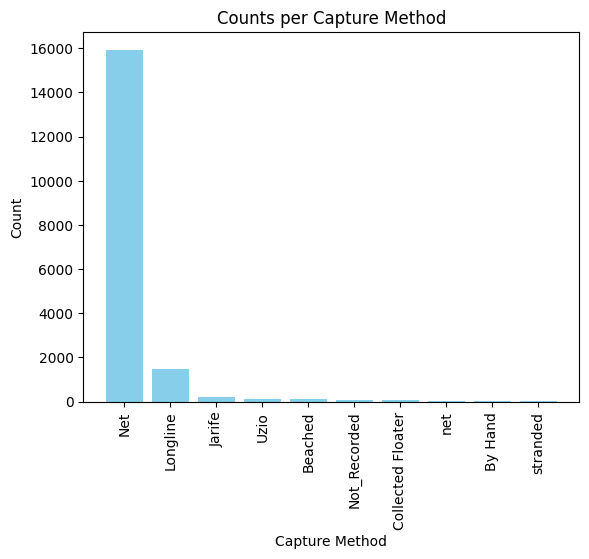

In [153]:
capture_method_counts=data['CaptureMethod'].value_counts()
#plotting bar chart
plt.bar(capture_method_counts.head(10).index,capture_method_counts.head(10).values,color='skyblue')
plt.xlabel('Capture Method')
plt.ylabel('Count')
plt.title('Counts per Capture Method')
plt.xticks(rotation='vertical')
plt.show()

In [154]:
# Column Fisher "Name of the fisher who captured the turtle"
data['Fisher']

0        Fisher_1072
1         Fisher_520
2        Fisher_1669
3        Fisher_1798
4        Fisher_1918
            ...     
18057     Fisher_569
18058     Fisher_125
18059    Fisher_1343
18060    Fisher_1551
18061    Fisher_1551
Name: Fisher, Length: 18062, dtype: object

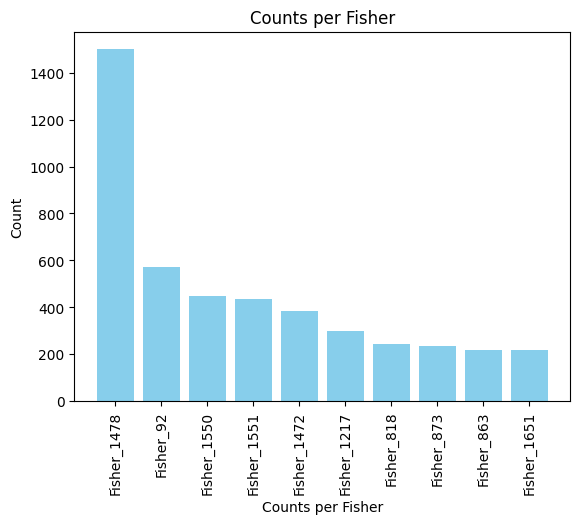

In [155]:
counts_per_fisher=data['Fisher'].value_counts()
plt.bar(counts_per_fisher.head(10).index,counts_per_fisher.head(10).values,color='skyblue')
plt.xlabel('Counts per Fisher')
plt.ylabel('Count')
plt.title('Counts per Fisher')
plt.xticks(rotation='vertical')
plt.show()

In [156]:
#Column "Landing_Site","Section of beach where turtle is landed."
data['LandingSite']

0        LandingSite_CaptureSiteCategory_2
1        LandingSite_CaptureSiteCategory_2
2        LandingSite_CaptureSiteCategory_2
3        LandingSite_CaptureSiteCategory_2
4        LandingSite_CaptureSiteCategory_2
                       ...                
18057    LandingSite_CaptureSiteCategory_1
18058    LandingSite_CaptureSiteCategory_1
18059    LandingSite_CaptureSiteCategory_1
18060    LandingSite_CaptureSiteCategory_1
18061    LandingSite_CaptureSiteCategory_1
Name: LandingSite, Length: 18062, dtype: object

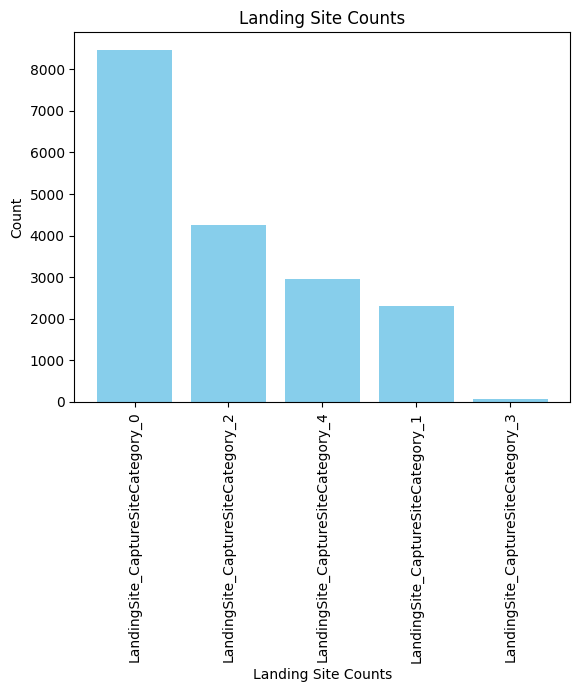

In [157]:
landing_site_counts=data['LandingSite'].value_counts()
plt.bar(landing_site_counts.head(10).index,landing_site_counts.head(10).values,color='skyblue')
plt.xlabel('Landing Site Counts')
plt.ylabel('Count')
plt.title('Landing Site Counts')
plt.xticks(rotation='vertical')
plt.show()

In [158]:
# Column "Species","Species of turtle (e.g. green turtle, hawksbill, loggerhead etc.)"
data['Species']

0        Species_6
1        Species_6
2        Species_5
3        Species_6
4        Species_5
           ...    
18057    Species_5
18058    Species_6
18059    Species_5
18060    Species_5
18061    Species_6
Name: Species, Length: 18062, dtype: object

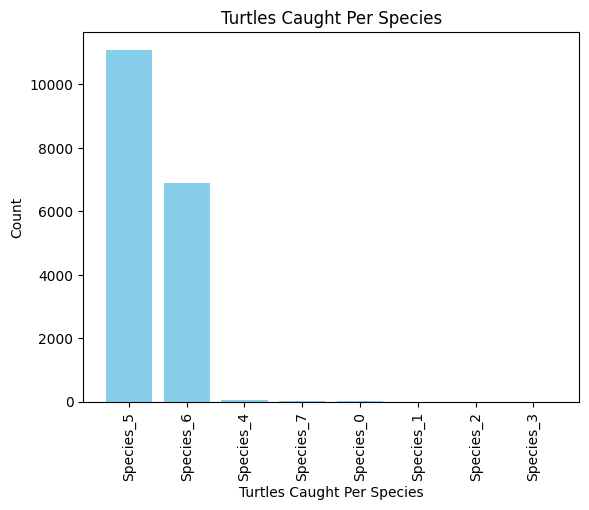

In [159]:
turtles_caught_per_species=data['Species'].value_counts()
plt.bar(turtles_caught_per_species.head(10).index,turtles_caught_per_species.head(10).values,color='skyblue')
plt.xlabel('Turtles Caught Per Species')
plt.ylabel('Count')
plt.title('Turtles Caught Per Species')
plt.xticks(rotation='vertical')
plt.show()

In [160]:
# Column "Tag_1","Individual / unique number used to identify a turtle. 
# Each turtle that is captured is tagged. 
# Formats of tag numbers have been changed over years, although turtles retain their old tags even when recaptured (unless the tags are about to fall or are too tight, then they are replaced)."
data['Tag_1']

0               CC00147
1                  W442
2                KE0376
3               CC00302
4        NotTagged_0113
              ...      
18057           KES1828
18058           KES0563
18059           KES1833
18060           KES1831
18061           KES1432
Name: Tag_1, Length: 18062, dtype: object

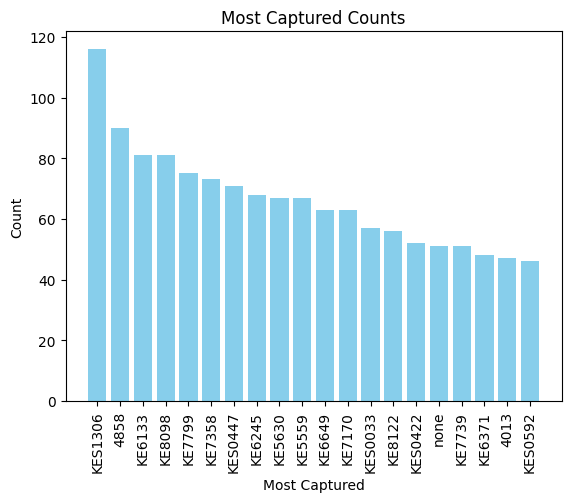

In [161]:
most_captured=data['Tag_1'].value_counts()
plt.bar(most_captured.head(20).index,most_captured.head(20).values,color='skyblue')
plt.xlabel('Most Captured')
plt.ylabel('Count')
plt.title('Most Captured Counts')
plt.xticks(rotation='vertical')
plt.show()

In [162]:
#"Tag_2","Second tag added to large turtles. 
#Turtles with two tags: tag 1 is an odd number e.g. KEL0169 and tag 2 is even and consequent e.g. KEL0170"
data['Tag_2']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
18057     NaN
18058     NaN
18059     NaN
18060     NaN
18061    none
Name: Tag_2, Length: 18062, dtype: object

In [163]:
data['Tag_2'].value_counts()

Tag_2
none       4194
NONE        432
3841          5
KEB7536       4
KEB7600       4
           ... 
KES1690       1
KE5570        1
KEB7702       1
KEB8235       1
KEL0227       1
Name: count, Length: 246, dtype: int64

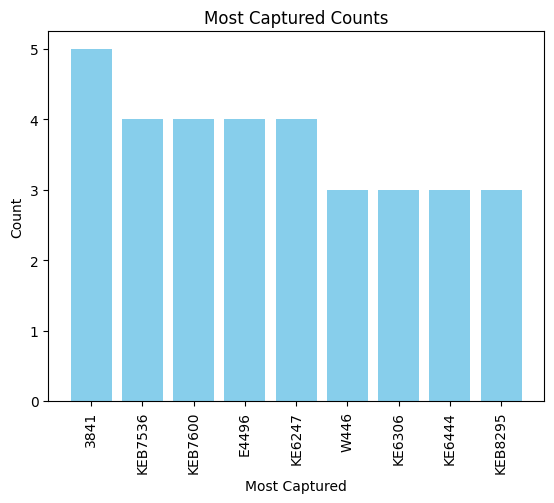

In [164]:
most_captured=data['Tag_2'].value_counts()
selected_counts=most_captured.iloc[2:11]
plt.bar(selected_counts.index,selected_counts.values,color='skyblue')
plt.xlabel('Most Captured')
plt.ylabel('Count')
plt.title('Most Captured Counts')
plt.xticks(rotation='vertical')
plt.show()

In [165]:
#"Lost_Tags","Replaced tags.
# If a turtle has outgrown its tag, the tag is removed and replaced with a bigger one, with a different number"
data['Lost_Tags']


0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
18057        NaN
18058    KES0416
18059        NaN
18060        NaN
18061        NaN
Name: Lost_Tags, Length: 18062, dtype: object

In [166]:
data['Lost_Tags'].value_counts()

Lost_Tags
KE6491    116
KE5571     75
KE6375     56
KE1457     26
KE1436     24
         ... 
KE0634      1
KE1953      1
KE1659      1
KE3084      1
KE7901      1
Name: count, Length: 167, dtype: int64

In [167]:
#Column "T_Number","It a number given to a turtle that has been taken to the rehabilitation facility (TRC) for treatment. 
# TRC identifies patients using T number, instead of �Rescue ID�. Thus, �T number� is the link between bycatch and TRC"
data['T_Number'].value_counts()

T_Number
T-123                  1
T126                   1
T468                   1
T-470                  1
T491                   1
T-492                  1
T-472                  1
T479                   1
T004                   1
T487                   1
T501                   1
T001                   1
T474                   1
T469                   1
t-490                  1
T467                   1
T563                   1
FIND OUT WHAT IT IS    1
T473                   1
T-250                  1
T125                   1
t-489                  1
T002                   1
T559                   1
T558                   1
T562                   1
T561                   1
T476                   1
T564                   1
T462                   1
T007                   1
T560                   1
T-140                  1
T493                   1
T471                   1
T478                   1
T494                   1
T466                   1
Name: count, dtype: int64

In [168]:
#Column "CCL_cm","Central Carapace Length (Biometric measurement). Measured in centimetres"
data['CCL_cm'].value_counts()

CCL_cm
40.00    172
41.00    150
41.50    142
39.00    142
42.00    142
        ... 
51.27      1
45.77      1
30.87      1
49.05      1
57.13      1
Name: count, Length: 1338, dtype: int64

In [169]:
#"CCW_cm","Central Carapace Width (Biometric measurement). Measured in centimetres"
data['CCW_cm'].value_counts()

CCW_cm
40.00    183
38.00    149
39.00    145
42.00    142
41.00    139
        ... 
11.40      1
53.13      1
53.03      1
29.97      1
50.57      1
Name: count, Length: 1262, dtype: int64

In [170]:
#Column "Weight_Kg","(Biometric measurement). Measured in Kgs"
data['Weight_Kg'].value_counts()

Weight_Kg
8.50     240
4.50     239
6.50     237
5.50     221
7.50     210
        ... 
54.60      1
12.64      1
11.51      1
14.34      1
21.09      1
Name: count, Length: 1937, dtype: int64

In [171]:
#Column "Sex","Gender of the turtle
data['Sex'].value_counts()

Sex
Unknown         13578
Female            113
Male               39
Not_Recorded        2
Name: count, dtype: int64

In [172]:
 # Turtle Characteristics","Description of turtles (mostly unusual occurrences e.g. disease, injury, parasites etc. 
 # Usually as short textual description"
 data['TurtleCharacteristics']

0                                   algae at rear of shell
1        multiple b's on front flippers&  a lot of alga...
2                                                    clean
3        1 b 3 CS+ calcerous algae at rear end of shell...
4        very lively+ right eye is hanging out + swolle...
                               ...                        
18057                   White calcareous algae on carapace
18058    Calcareous + green algae on carapace\nBarnacle...
18059                                         Clean turtle
18060    Green algae on carapace\ntip of left supra mis...
18061    Thick pink patches of calcareous algae on cara...
Name: TurtleCharacteristics, Length: 18062, dtype: object

In [173]:
 # Column "Status","Indicates whether the turtle is released or admitted to TRC"
 data['Status']

0        Released
1        Released
2        Released
3        Released
4        Released
           ...   
18057    Released
18058    Released
18059    Released
18060    Released
18061    Released
Name: Status, Length: 18062, dtype: object

In [174]:
data['Status'].value_counts()

Status
Released                                          13610
Admitted                                            292
Not_Recorded                                         28
 shell is beginning to flake                          7
 green algae on carapace                              7
                                                  ...  
 barnacles on plastron (removed)                      1
 notches on RMS                                       1
 small barnacles around neck and rear flippers        1
 5 RLS                                                1
 barnacles on plastron                                1
Name: count, Length: 439, dtype: int64

In [175]:
# Column "Release Site","Site where the turtle is released"
data['ReleaseSite']

0        ReleaseSite_50
1        ReleaseSite_62
2        ReleaseSite_50
3        ReleaseSite_50
4        ReleaseSite_62
              ...      
18057    ReleaseSite_68
18058    ReleaseSite_68
18059    ReleaseSite_68
18060    ReleaseSite_68
18061    ReleaseSite_37
Name: ReleaseSite, Length: 18062, dtype: object

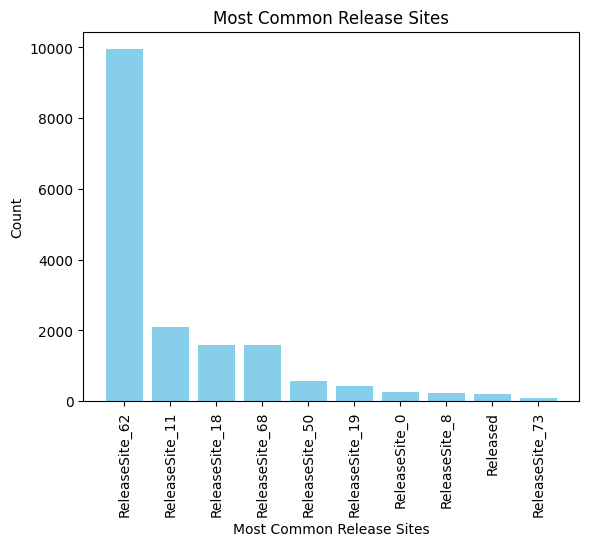

In [176]:
most_common_release_sites=data['ReleaseSite'].value_counts()
plt.bar(most_common_release_sites.head(10).index,most_common_release_sites.head(10).values,color='skyblue')
plt.xlabel('Most Common Release Sites')
plt.ylabel('Count')
plt.title('Most Common Release Sites')
plt.xticks(rotation='vertical')
plt.show()

In [177]:
# Column Date_Release","Date turtle is released"
data['Date_TimeRelease']

0        22/12/00
1        28/10/01
2        01/11/01
3        11/03/02
4        08/08/02
           ...   
18057    18/12/18
18058    18/12/18
18059    24/12/18
18060    24/12/18
18061    28/12/18
Name: Date_TimeRelease, Length: 18062, dtype: object

In [178]:
#Convert Date_TimeReleased to datetime object
data['Date_TimeRelease']=pd.to_datetime(data['Date_TimeRelease'], format="%d/%m/%y",errors='coerce')

In [179]:
data['Day(R)'] = data['Date_TimeRelease'].dt.day
data['Month(R)'] = data['Date_TimeRelease'].dt.month
data['Year(R)'] = data['Date_TimeRelease'].dt.year

In [182]:
data['Year(R)'].value_counts()

Year(R)
2012.0    1615
2014.0    1586
2015.0    1572
2018.0    1514
2017.0    1369
2016.0    1367
2013.0    1263
2011.0     570
2002.0     247
2001.0     184
2010.0      68
2000.0      39
1999.0      33
2005.0      16
1998.0      11
2004.0      11
2006.0       7
2007.0       7
2008.0       5
2003.0       2
2009.0       2
2028.0       1
Name: count, dtype: int64

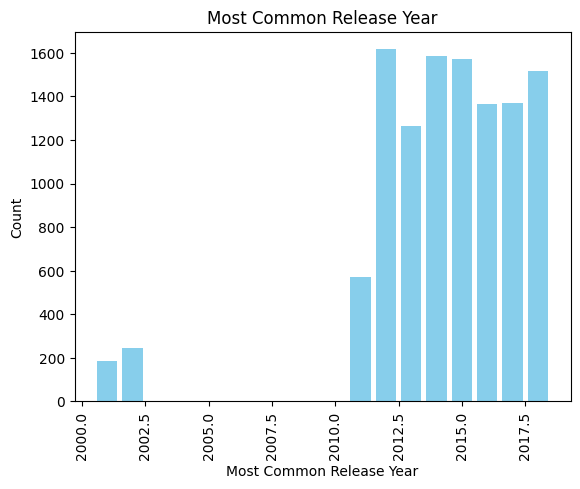

In [183]:
most_common_release_year=data['Year(R)'].value_counts()
plt.bar(most_common_release_year.head(10).index,most_common_release_year.head(10).values,color='skyblue')
plt.xlabel('Most Common Release Year')
plt.ylabel('Count')
plt.title('Most Common Release Year')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
data.columns

Index(['Rescue_ID', 'Date_TimeCaught', 'Researcher', 'CaptureSite',
       'ForagingGround', 'CaptureMethod', 'Fisher', 'LandingSite', 'Species',
       'Tag_1', 'Tag_2', 'Lost_Tags', 'T_Number', 'CCL_cm', 'CCW_cm',
       'Weight_Kg', 'Sex', 'TurtleCharacteristics', 'Status', 'ReleaseSite',
       'Date_TimeRelease', 'Year', 'Rescue_number', 'Month', 'Day', 'Year(1)',
       'Identical'],
      dtype='object')

In [ ]:
#check for missing values
data.isna().sum()

Rescue_ID                    0
Date_TimeCaught              0
Researcher                   0
CaptureSite                  0
ForagingGround               0
CaptureMethod                0
Fisher                       0
LandingSite                  0
Species                      0
Tag_1                      125
Tag_2                    13151
Lost_Tags                17137
T_Number                 18024
CCL_cm                      24
CCW_cm                      27
Weight_Kg                 5409
Sex                       4330
TurtleCharacteristics       52
Status                    3633
ReleaseSite                 75
Date_TimeRelease          6108
Year                         0
Rescue_number                0
Month                        0
Day                          0
Year(1)                      0
Identical                    0
dtype: int64